<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Likes.csv", index_col = "userid")

df.head(2)

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0


<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

### Question 1: Answer

In [3]:
df.columns

Index(['age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

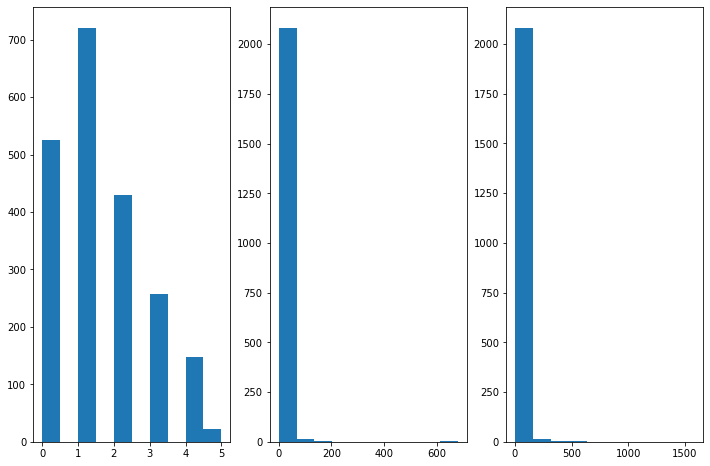

In [4]:
plt.subplots(figsize = (12,8))

plt.subplot(1,3,1)
plt.hist(df["friendships_initiated"])

plt.subplot(1,3,2)
plt.hist(df["mobile_likes_received"])

plt.subplot(1,3,3)
plt.hist(df["www_likes"])

plt.show()

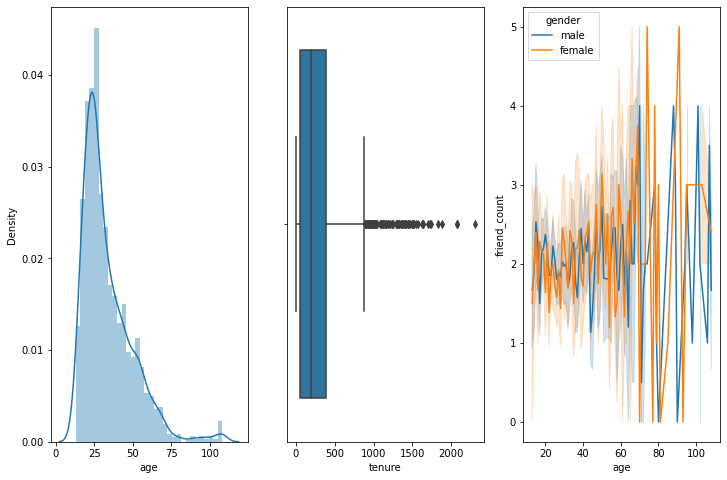

In [5]:
plt.subplots(figsize = (12,8))

plt.subplot(1,3,1)
sns.distplot(df["age"])

plt.subplot(1,3,2)
sns.boxplot(df["tenure"])

plt.subplot(1,3,3)
sns.lineplot(df["age"], df["friend_count"], hue = df["gender"])

plt.show()

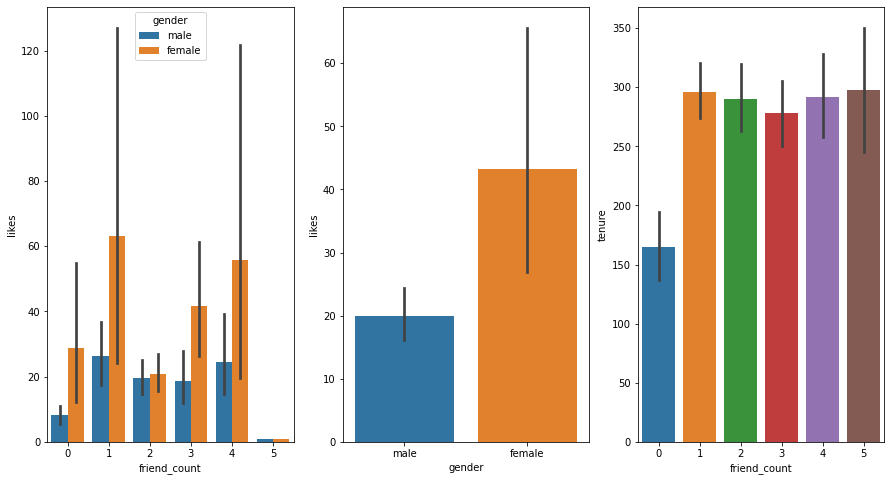

In [6]:
plt.subplots(figsize = (15,8))

plt.subplot(1,3,1)
sns.barplot(df["friend_count"], df["likes"], hue = df["gender"])

plt.subplot(1,3,2)
sns.barplot(x = df["gender"], y=  df["likes"])

plt.subplot(1,3,3)
sns.barplot(x = df["friend_count"], y = df["tenure"])


plt.show()

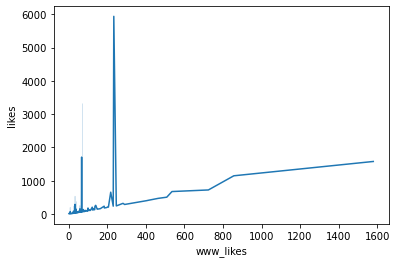

In [7]:
sns.lineplot(x = df["www_likes"], y = df["likes"])
plt.show()

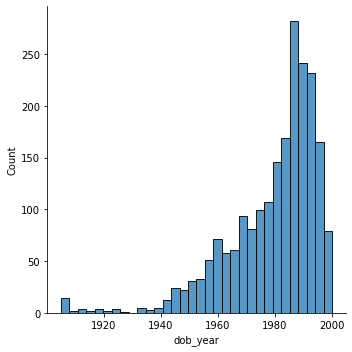

In [8]:
sns.displot(df["dob_year"])
plt.show()

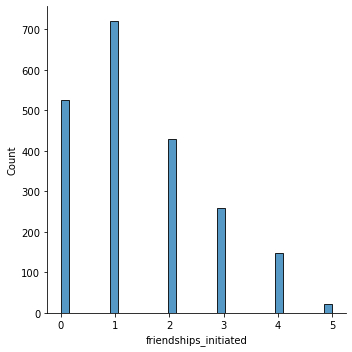

In [9]:
sns.displot(df["friendships_initiated"])

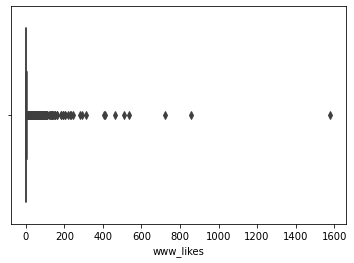

In [10]:
sns.boxplot(df["www_likes"])
plt.show()

<AxesSubplot:xlabel='mobile_likes_received'>

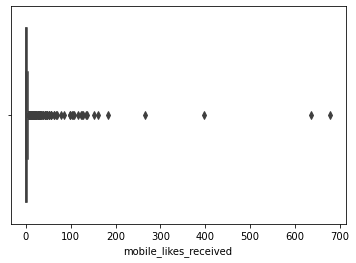

In [11]:
sns.boxplot(df["mobile_likes_received"])

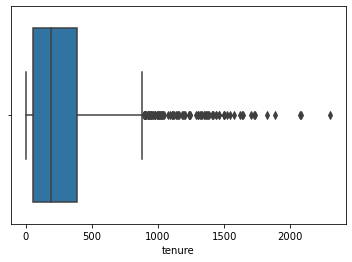

In [12]:
sns.boxplot(df["tenure"])
plt.show()

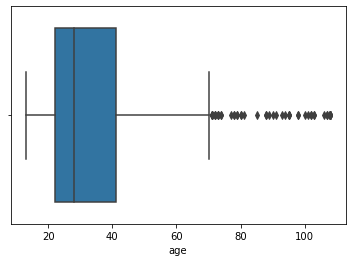

In [13]:
sns.boxplot(df["age"])
plt.show()

In [14]:
df.columns

Index(['age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [15]:
df.skew()

age                       1.628574
dob_day                   0.241908
dob_year                 -1.628574
dob_month                 0.160282
tenure                    2.083550
friend_count              0.339367
friendships_initiated     0.694958
likes                    24.959317
likes_received           18.418021
mobile_likes             28.564966
mobile_likes_received    18.566706
www_likes                16.941493
www_likes_received       17.059494
dtype: float64

### Inference:
#### skewness is too much in our data
#### Highly skewed Variables are likes, likes_received, mobile_likes, moble_likes_received, www_likes, www_likes_received

<Figure size 576x576 with 0 Axes>

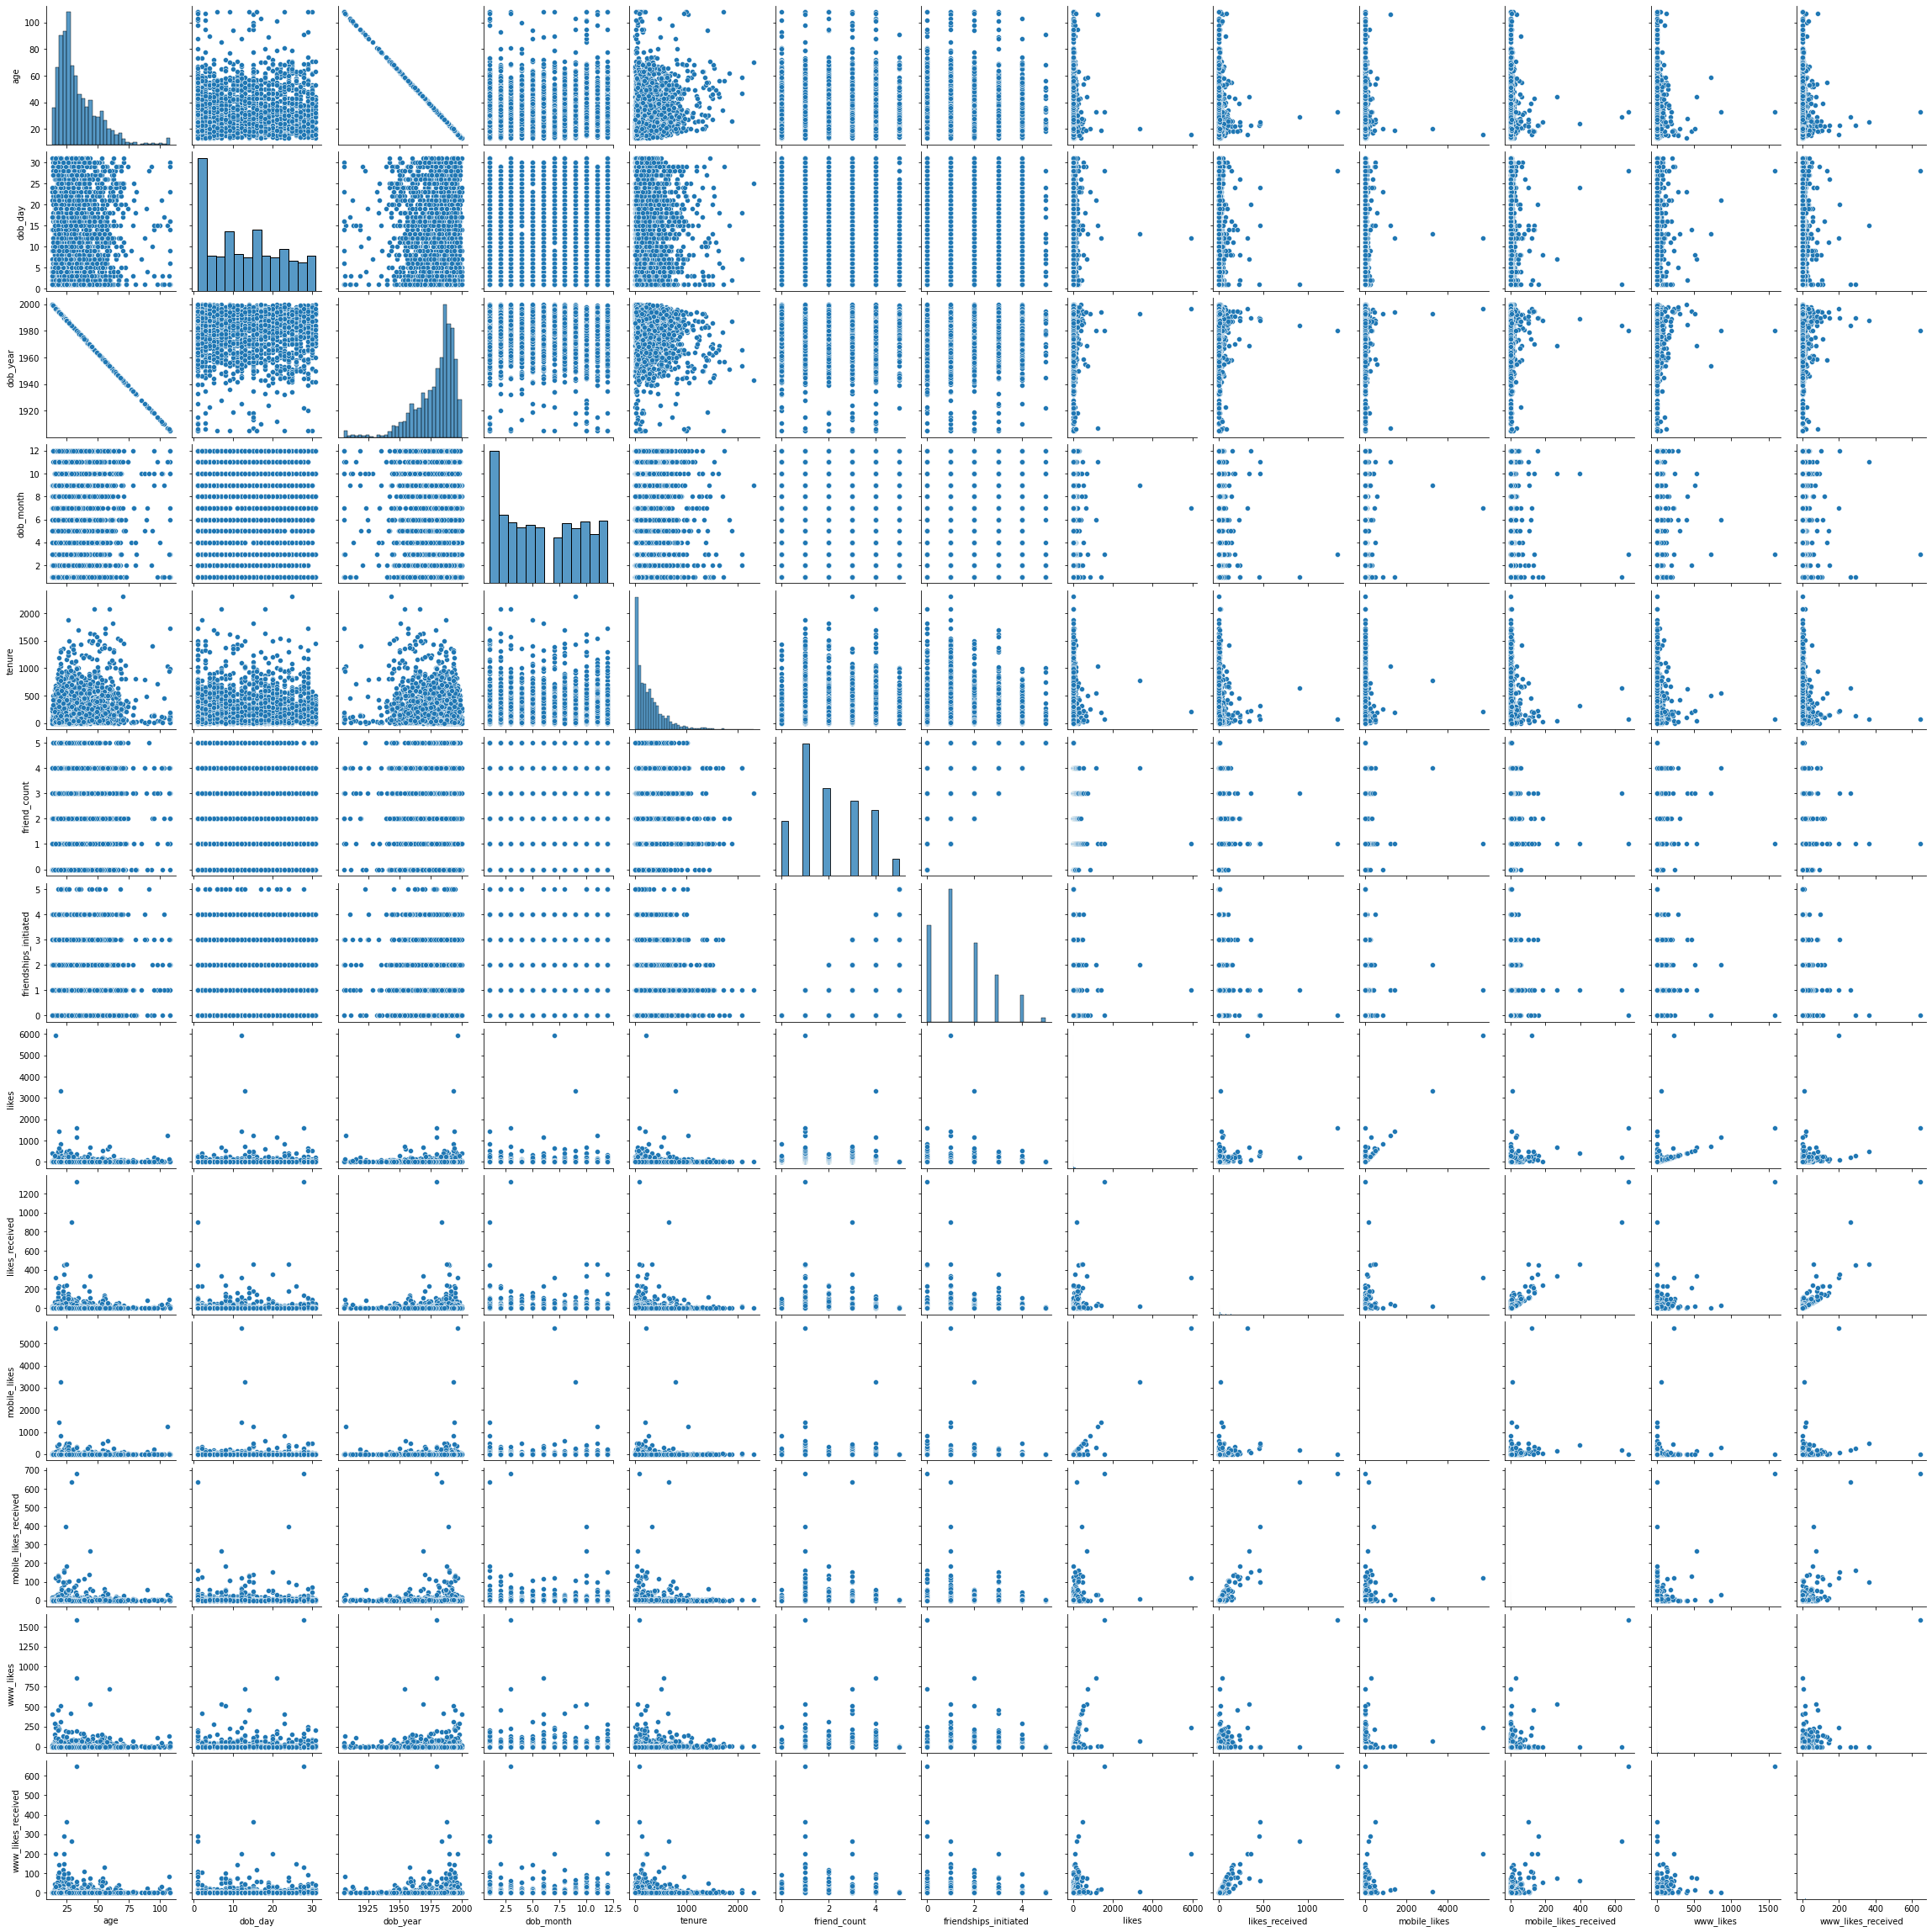

In [16]:
plt.figure(figsize = (8,8))
sns.pairplot(df)
plt.show()

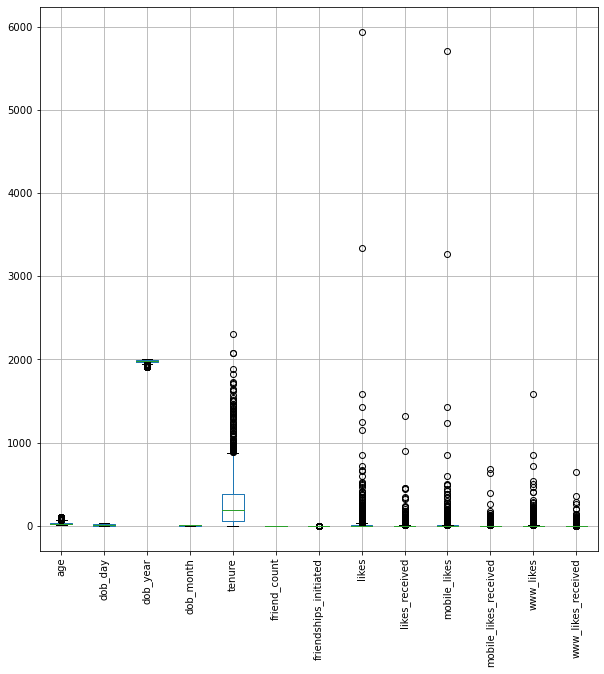

In [17]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation = "vertical")
plt.show()

### Inference :
#### As per above pairplot and boxplot we can visualize that data have outliers

## Question 2

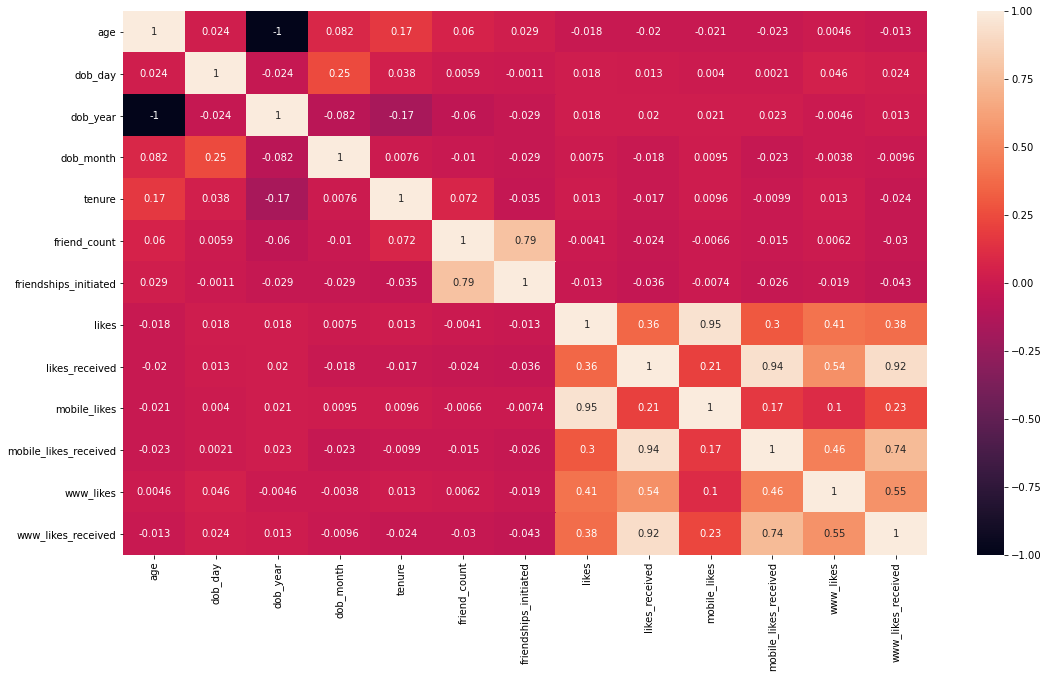

In [18]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### mobile_likes is highly correlated with dependent variable (likes)

### Independent variables correlation: for more than +-(0.70)

#### 1. mobile_likes_received and likes_received
#### 2. www_likes_received and likes_received
#### 3. friendship_initiates and friend_count
#### 4. www_likes_received and mobile_likes_received

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

### Question -3.1

In [19]:
x = df.drop("likes", axis =1)
y = df["likes"]

### Question- 3.2

In [20]:
gender_dummie = pd.get_dummies(df["gender"], drop_first=True)

x1 = df.drop(["gender","likes"], 1)

X = pd.concat([gender_dummie, x1], axis =1)

In [21]:
print(X.shape) # Independent variables (X)

df.shape

(2104, 13)


(2104, 14)

### Question - 3.3

In [22]:
df.head(2)

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0


In [23]:
df["friendships_initiated"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [24]:
# Standard scaling on data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X["tenure"] = ss.fit_transform(X[["tenure"]])
X["likes_received"]  = ss.fit_transform(X[["likes_received"]])
X["mobile_likes"]  = ss.fit_transform(X[["mobile_likes"]])
X["mobile_likes_received"]  = ss.fit_transform(X[["mobile_likes_received"]])
X["www_likes"]  = ss.fit_transform(X[["www_likes"]])
X["www_likes_received"]  = ss.fit_transform(X[["www_likes_received"]])


In [25]:
X["age"]  = ss.fit_transform(X[["age"]])
X["dob_day"]  = ss.fit_transform(X[["dob_day"]])
X["dob_year"]  = ss.fit_transform(X[["dob_year"]])
X["dob_month"]  = ss.fit_transform(X[["dob_month"]])
X["friend_count"]  = ss.fit_transform(X[["friend_count"]])
X["friendships_initiated"]  = ss.fit_transform(X[["friendships_initiated"]])
X["male"] = ss.fit_transform(X[["male"]])

In [26]:
X.head(2)

,male,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,
1098638,0.709124,-1.264734,-1.206123,1.264734,-1.049932,-0.923558,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746
2063204,0.709124,-1.202820,0.958305,1.202820,-1.320351,-0.573905,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746


### Question - 3.4

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 5, test_size=0.3)

In [29]:
print(X_train.shape)
print(X_test.shape)

(1472, 13)
(632, 13)


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



### Question - 4.1

In [30]:
# Using OLS method 
import statsmodels.api as sm

Xc = sm.add_constant(X_train)
model = sm.OLS(y_train,Xc).fit()

In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.096e+32
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:02:30   Log-Likelihood:                 42285.
No. Observations:                1472   AIC:                        -8.455e+04
Df Residuals:                    1460   BIC:                        -8.448e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    27.65

In [32]:
# using Linear Regression from Sklearn Library

from sklearn.linear_model import LinearRegression

lir = LinearRegression()
model = lir.fit(X_train,y_train)

### Question - 4.2

In [33]:
y_pred_test = model.predict(X_test)

y_pred_train = model.predict(X_train)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print("R2 Train: ", r2_train)
print("RMSE Train: ", np.sqrt(mse_train))

R2 Train:  1.0
RMSE Train:  1.9065897713493946e-13


In [36]:
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("R2 Test: ", r2_test)
print("RMSE Test: ", np.sqrt(mse_test))

R2 Test:  1.0
RMSE Test:  1.8165382346342563e-13


In [37]:
# model is performing well in train and test dataset

### Question 4.3

In [38]:
from sklearn.feature_selection import RFE

lir = LinearRegression()
model4 = lir.fit(X,y)
rfe = RFE(model4)
rfe.fit(X,y)


RFE(estimator=LinearRegression())

In [39]:
# Using gridsearchCv we can find the best number of features for our model

from sklearn.model_selection import GridSearchCV
param = {"n_features_to_select": range(4,30)}
gs = GridSearchCV(rfe, param_grid = param)
gs.fit(X,y)
gs.best_params_

{'n_features_to_select': 4}

In [40]:
model4 = lir.fit(X,y)
rfe = RFE(model4, n_features_to_select = 4)
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [41]:
rfe_df = pd.DataFrame(rfe.ranking_, index = X.columns, columns =["RFE"])

features = rfe_df[rfe_df["RFE"]==1].index

In [42]:
X4 = X[features]
x_train,x_test, y_train,y_test = train_test_split(X4, y, random_state= 10, test_size=0.3)

In [43]:
xc4 = sm.add_constant(x_train)

stat_model = sm.OLS(y_train, xc4).fit()

xc5 = sm.add_constant(x_test)
y_pred = stat_model.predict(xc5)

r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

y_pred_train = stat_model.predict(xc4)

r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print("R2 Train", r2_train)
print("RMSE Train", rmse_train)
print("\n")
print("R2 Test", r2_test)
print("RMSE Test", rmse_test)

R2 Train 1.0
RMSE Train 3.548871435390281e-13


R2 Test 1.0
RMSE Test 3.370752287867635e-13


In [44]:
# model is performing good in train and test set

### Question 4.4

In [53]:
df_cat = x.select_dtypes(include = "object")
df_num = x.select_dtypes(exclude = "object")

dummy = pd.get_dummies(df_cat, drop_first=True)
X9 = pd.concat([dummy, df_num], axis =1)
y = df["likes"]
x_train,x_test, y_train,y_test = train_test_split(X9, y, random_state=5, test_size=0.3)

In [66]:
lir = LinearRegression()
lir.fit(x_train,  y_train)

LinearRegression()

In [67]:
rfe = RFE(lir)
rfe.fit(x_train,y_train)
rfe.ranking_

array([4, 1, 6, 1, 7, 8, 5, 3, 1, 1, 2, 1, 1])

In [71]:
param = {"n_features_to_select": range(0,20)}
gs = GridSearchCV(rfe, param_grid=param, cv =3)
gs.fit(x_train,y_train)
gs.best_params_

{'n_features_to_select': 2}

In [74]:
rfe = RFE(lir, n_features_to_select = 2 )
rfe.fit(x_train,y_train)
rfe = pd.DataFrame(rfe.ranking_, index = x_train.columns, columns = ["RFE"])

In [80]:
ftr = rfe[rfe["RFE"]==1].index

In [85]:
x = X9[ftr]

lir = LinearRegression()
lir.fit(x,y)
y_pred = lir.predict(x)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

### Question 5.1

In [123]:
x5 = X
y = df["likes"]
xc5 = sm.add_constant(x5)

model = sm.OLS(y,xc5).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.244e+32
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:52:07   Log-Likelihood:                 60293.
No. Observations:                2104   AIC:                        -1.206e+05
Df Residuals:                    2092   BIC:                        -1.205e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    27.65

In [95]:
# y = const + gender_male *  1.377e-14  + age * -4.857e-16 + ...................
# Parameters are linear 

### Question 5.2

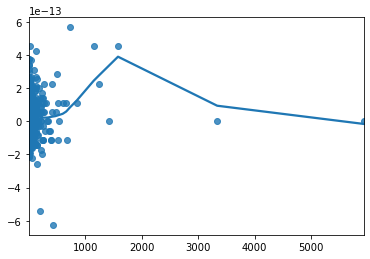

In [124]:
y_pred = model.predict(xc5)
res = model.resid

sns.regplot(x = y_pred, y= res, lowess=True)
plt.show()

In [125]:
# H0: Residuals variance are constant
# H1: Residuals variance are not equal

import statsmodels.stats.api as sms

sms.het_goldfeldquandt(y= res, x = xc5)

# p_value < 0.5
# reject null hypothesis
# Hence Residual variance are not constant

(1.483630621066044, 1.1560675243665889e-10, 'increasing')

### Question 5.3

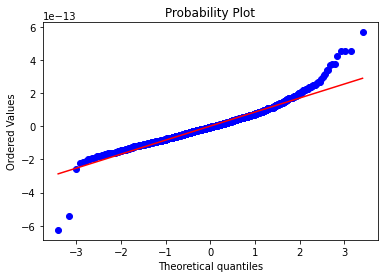

In [126]:
# Visualize using Q-Q plot

import scipy.stats as stats
stats.probplot(res, plot = plt)
plt.show()

In [127]:
# H0: residuals are normal
# h1: residuals are not normal
stats.shapiro(res)

# p_value < 0.05
# Ho is rejected 
# Residuals are not normal


ShapiroResult(statistic=0.9517073631286621, pvalue=8.733191270730932e-26)

### Question 5.4

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif1 = pd.DataFrame([vif(xc5.values,i) for i in range(len(xc5.columns))], index = xc5.columns, columns =["VIF"])

In [129]:
vif1

,VIF
const,10.825340
male,1.010554
age,inf
dob_day,1.069187
dob_year,inf
dob_month,1.074013
tenure,1.061266
friend_count,2.711774
friendships_initiated,2.702346
likes_received,inf


<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

### Question 6.A

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)

In [150]:
lir = LinearRegression()
model6 = lir.fit(x_train,  y_train)

rfe6 = RFE(model6)
rfe6.fit(x_train, y_train)

param = {"n_features_to_select": range(len(x_train.columns))}

gs6 = GridSearchCV(rfe6, param_grid =param, cv=3, scoring = "r2" ) 
gs6.fit(x_train,y_train)

print(gs6.best_params_)

pd.DataFrame(gs6.cv_results_).head(5)

{'n_features_to_select': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015961,0.001413,0.000000,0.000000,0,{'n_features_to_select': 0},NaN,NaN,NaN,NaN,NaN,13
1,0.009973,0.000814,0.001330,0.000470,1,{'n_features_to_select': 1},0.586083,0.390512,0.915718,0.630771,0.21673,12
2,0.009924,0.001315,0.001330,0.000470,2,{'n_features_to_select': 2},1.000000,1.000000,1.000000,1.000000,0.00000,1
3,0.007981,0.000833,0.001652,0.000963,3,{'n_features_to_select': 3},1.000000,1.000000,1.000000,1.000000,0.00000,1
4,0.009824,0.002075,0.001676,0.000478,4,{'n_features_to_select': 4},1.000000,1.000000,1.000000,1.000000,0.00000,1


In [142]:
rfe = RFE(model6, n_features_to_select = 2)
rfe.fit(x_train, y_train)

rfe3 = pd.DataFrame(rfe.ranking_, index = x_train.columns, columns = ["RFE"])

In [143]:
features = rfe3[rfe3["RFE"] == 1].index

#### Model building by features selected through RFE

In [151]:
X6 = X[features]

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X6, y, random_state=5, test_size=0.3)

In [156]:
lir1 = LinearRegression()
model = lir1.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [168]:
sse = sum(y_test - y_pred)**2
ssr = sum(y_pred - np.mean(y_test))**2
sst = sse + ssr

r2 = ssr/sst
rmse = np.sqrt(np.mean(y_test - y_pred)**2)

print("R2: ", r2)
print("RMSE: ", rmse)

R2:  0.9901660430322279
RMSE:  2.453733418981675e-15


### Question 6.B

In [169]:
from sklearn.model_selection import KFold, cross_val_score

In [171]:
kf = KFold(n_splits= 5)

In [173]:
cv_score = cross_val_score(model, x_train, y_train, cv=kf, scoring="r2")

In [176]:
np.mean(cv_score)

1.0